In this notebook, we will be exploring the Journals dataset to check for management controls and then investigate the Sales dataset using descriptive statistics to check for financial performance.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set decimals to only be displayed to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

# Journals Dataset

In [2]:
#import dataset
journals = pd.read_excel('Journals.xlsx')

In [3]:
#verify import
journals

,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,JnlPreparerName,JnlAuthoriserName
0,00-80-8033,Provision for Sales Schemes,ZZX,0.00,9668.59,2019-1,1,Reversed By Jnl 2019-9 Journal No. 277,-9668.59,HV09,AS13,01/01/2019 13:04,Lakeisha Testerman,Jonelle Moseley
1,00-10-1002,Provisions - Trade Sales,XXX,9668.59,0.00,2019-1,1,Reversed By Jnl 2019-9 Journal No. 277,9668.59,HV09,AS13,01/01/2019 13:04,Lakeisha Testerman,Jonelle Moseley
2,00-80-8033,Provision for Sales Schemes,ZZX,0.00,291191.30,2019-1,1,Reversed By Jnl 2019-9 Journal No. 277,-291191.30,HV09,AS13,01/01/2019 13:04,Lakeisha Testerman,Jonelle Moseley
3,00-10-1001,Trade Sale Recycle Scheme,ZZZ,291191.30,0.00,2019-1,1,Reversed By Jnl 2019-9 Journal No. 277,291191.30,HV09,AS13,01/01/2019 13:04,Lakeisha Testerman,Jonelle Moseley
4,00-20-2004,Provision for Obselete Inventory,923,0.00,12848.50,2019-1,10,Reversed By Jnl 2019-4 Journal No. 366,-12848.50,DF18,TC01,30/01/2019 09:56,Jon Mckinley,Johnny Hevey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,00-80-8045,Tax Output,ZZXXZ,71578.85,0.00,2019-12,538,NaN,71578.85,AC04,SP18,31/12/2019 19:38,Lorelei Ory,Maye Ahl
3957,00-80-8045,Tax Output,ZZXXZ,355942.31,0.00,2019-12,538,NaN,355942.31,AC04,SP18,31/12/2019 19:38,Lorelei Ory,Maye Ahl
3958,00-80-8043,Tax Control,XXX,0.00,355942.31,2019-12,538,NaN,-355942.31,AC04,SP18,31/12/2019 19:38,Lorelei Ory,Maye Ahl
3959,00-80-8044,Tax Input,XZZX,0.00,878901.14,2019-12,538,NaN,-878901.14,AC04,SP18,31/12/2019 19:38,Lorelei Ory,Maye Ahl


In [4]:
#confirm datatypes
journals.info()

#need to change JnlDateTime data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Account            3961 non-null   object 
 1   AccountDesc        3961 non-null   object 
 2   TransDesc          3961 non-null   object 
 3   Debit              3961 non-null   float64
 4   Credit             3961 non-null   float64
 5   Period             3961 non-null   object 
 6   JnlNo              3961 non-null   int64  
 7   JnlDesc            700 non-null    object 
 8   Amount             3961 non-null   float64
 9   JnlPrep            3961 non-null   object 
 10  JnlAuth            3961 non-null   object 
 11  JnlDateTime        3961 non-null   object 
 12  JnlPreparerName    3961 non-null   object 
 13  JnlAuthoriserName  3961 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 433.4+ KB


In [5]:
#change JnlDateTime
journals['JnlDateTime'] = pd.to_datetime(journals['JnlDateTime'], format = '%d/%m/%Y %H:%M')

In [6]:
#lets create a new column that contains the absolute value of each amount in each row
journals['AbsAmount'] =journals['Amount'].abs()

As per management controls, any journal entry must be prepared and authorized by different staff. Furthermore, only certain staff are allowed to prepare or authorize journal entries based on absolute amount. So lets check these controls.

In [7]:
#get column names for easier access below
journals.columns

Index(['Account', 'AccountDesc', 'TransDesc', 'Debit', 'Credit', 'Period',
       'JnlNo', 'JnlDesc', 'Amount', 'JnlPrep', 'JnlAuth', 'JnlDateTime',
       'JnlPreparerName', 'JnlAuthoriserName', 'AbsAmount'],
      dtype='object')

In [8]:
#lets create a new column which returns a boolean value (Trur or False) for each row, depending on authoriser and preparer names
journals['AuthIsRaiser'] = journals.JnlPreparerName == journals.JnlAuthoriserName

In [9]:
#store all records where preparer and authorizer are same, as a separate df
df = journals.query('AuthIsRaiser == True')
df

,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,JnlPreparerName,JnlAuthoriserName,AbsAmount,AuthIsRaiser
414,00-80-8033,Provision for Sales Schemes,ZZX,61192.50,0.00,2019-4,152,Reverses Jnl 2019-3 Journal No. 106,61192.50,CH20,CH20,2019-04-30 12:42:00,King Forkey,King Forkey,61192.50,True
415,00-10-1002,Provisions - Trade Sales,XXX,0.00,61192.50,2019-4,152,Reverses Jnl 2019-3 Journal No. 106,-61192.50,CH20,CH20,2019-04-30 12:42:00,King Forkey,King Forkey,61192.50,True
416,00-80-8033,Provision for Sales Schemes,ZZX,290889.34,0.00,2019-4,152,Reverses Jnl 2019-3 Journal No. 106,290889.34,CH20,CH20,2019-04-30 12:42:00,King Forkey,King Forkey,290889.34,True
417,00-10-1001,Trade Sale Recycle Scheme,ZZZ,0.00,290889.34,2019-4,152,Reverses Jnl 2019-3 Journal No. 106,-290889.34,CH20,CH20,2019-04-30 12:42:00,King Forkey,King Forkey,290889.34,True
426,00-70-7026,Bank Fees,684,26.22,0.00,2019-4,154,NaN,26.22,CH20,CH20,2019-04-30 12:10:00,King Forkey,King Forkey,26.22,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,00-20-2011,Inventory Adjustment,622,4018.98,0.00,2019-12,534,NaN,4018.98,AM04,AM04,2019-12-31 07:22:00,Ray Johansson,Ray Johansson,4018.98,True
3931,00-80-8027,Other Stock Costs,ZZZ,7905.21,0.00,2019-12,534,NaN,7905.21,AM04,AM04,2019-12-31 07:22:00,Ray Johansson,Ray Johansson,7905.21,True
3932,00-20-2011,Inventory Adjustment,624,0.00,7905.21,2019-12,534,NaN,-7905.21,AM04,AM04,2019-12-31 07:22:00,Ray Johansson,Ray Johansson,7905.21,True
3933,00-20-2011,Inventory Adjustment,626,0.00,16101.95,2019-12,534,NaN,-16101.95,AM04,AM04,2019-12-31 07:22:00,Ray Johansson,Ray Johansson,16101.95,True


In [10]:
#obtain the unique names of all people in this df
df['JnlPreparerName'].unique()

#these are all the accounts team staff that have prepared and authorized a single journal, these entries will be raised
#with management

array(['King Forkey \xa0', 'Ray Johansson \xa0', 'Jonelle Moseley \xa0'],
      dtype=object)

In [11]:
#lets now check the maximum absolute value each staff has dealt with and whether they were authorized to
journals.groupby('JnlAuthoriserName')['AbsAmount'].max()

JnlAuthoriserName
Johnny Hevey         888587.21
Jonelle Moseley      889896.65
King Forkey          997226.63
Lizbeth Arvin        887744.75
Maye Ahl             894362.91
Ray Johansson       1065322.15
Name: AbsAmount, dtype: float64

In [12]:
#also check the maximum absolute value for preparing
journals.groupby('JnlPreparerName')['AbsAmount'].max()

JnlPreparerName
Evalyn Reddout          894260.65
Jon Mckinley            931222.48
Jonelle Moseley         885729.38
King Forkey             887749.65
Lakeisha Testerman      886534.71
Latasha Terpstra        599069.15
Lorelei Ory             887906.97
Merrill Benzel         1065322.15
Nellie Pease            893951.34
Ray Johansson           997226.63
Name: AbsAmount, dtype: float64

In [13]:
#according to the delegation of authority (not available in this notebook), only one person has acted outside their delegation,
#this will also be raised to management (Ray Johansson, Fixed Asset Accountant, has authorized over 1 mil)

In [14]:
#lets now carry out descriptive statistics on the journals dataset

In [15]:
journals.describe()

#we can see that the debit and credit entries are symmetrical, there is also a large standard deviation

,Debit,Credit,JnlNo,Amount,AbsAmount
count,3961.00,3961.00,3961.00,3961.00,3961.00
mean,31565.90,31565.90,279.04,0.00,63131.81
std,115849.96,115849.96,160.83,169810.91,157636.01
min,0.00,0.00,1.00,-1065322.15,0.07
25%,0.00,0.00,136.00,-4162.38,149.87
50%,0.42,0.00,283.00,0.42,4162.38
75%,4162.38,4162.38,430.00,4162.38,26316.48
max,1065322.15,1065322.15,538.00,1065322.15,1065322.15


C:\Users\Sheha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


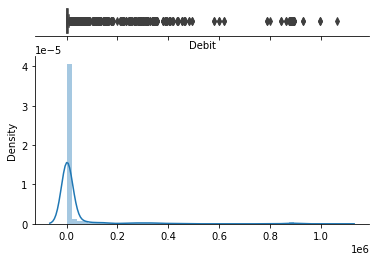

In [16]:
#lets look at the boxplot and distplot of the Debit column (the same findings will be available for all other columns)
f, (ax_box, ax_dist) = plt.subplots(2, sharex=True,  

                                    gridspec_kw={"height_ratios": (.15, .85)}) 

  

sns.boxplot(x=journals['Debit'], ax=ax_box) 

sns.distplot(x=journals['Debit'], ax=ax_dist) 

  

ax_box.set(yticks=[]) 

sns.despine(ax=ax_dist) 

sns.despine(ax=ax_box, left=True) 

#we can see that majority of journal entries have very small values and few entries that go upto large amounts, this leads to
#the high standard deviation we saw earlier

<AxesSubplot:xlabel='Debit'>

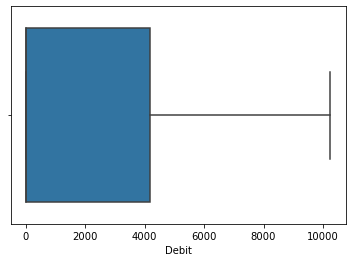

In [17]:
#Lets now look at the boxplot of Debit without outliers
sns.boxplot(x=journals['Debit'], showfliers = False) 

#we can see that data is skewed and the entries range upto around 10000

C:\Users\Sheha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JnlHour'>

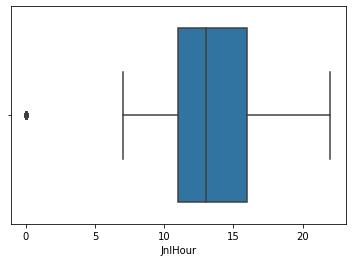

In [18]:
#lets look at the time a journal was posted
#First create a column containing the hour when journal was posted called JnlTime
journals['JnlHour'] = journals['JnlDateTime'].dt.hour 

# Create a boxplot of the hour the journal was posted
sns.boxplot(journals['JnlHour'])

#we can see that there are some journal entries that have been posted out of hours, these will be raised to management as well

# Sales Dataset

In [19]:
#import sales data

sales = pd.read_excel('Sales.xlsx')

In [20]:
#view all columns
pd.options.display.max_columns = None


In [21]:
#check datatypes
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Region          51290 non-null  object        
 12  Market          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [22]:
#check import
sales

#from looking at the available data, we will answer the following questions
#how many customers there are between 2016 and 2019
#what is the biggest segment, region and category
#impact of discount on profit

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,4042,MX-2015-AB1001539-42353,2019-12-15,2019-12-19,Standard Class,AB-1001539,Aaron Bergman,Consumer,Apopa,San Salvador,El Salvador,Central America,LATAM,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",610.60,2,0.00,238.12,57.83,Medium
1,4041,MX-2015-AB1001539-42353,2019-12-15,2019-12-19,Standard Class,AB-1001539,Aaron Bergman,Consumer,Apopa,San Salvador,El Salvador,Central America,LATAM,OFF-SU-2966,Office Supplies,Supplies,"Acme Box Cutter, High Speed",151.20,6,0.00,75.60,10.79,Medium
2,24145,IN-2015-AB1001558-42256,2019-09-09,2019-09-09,Same Day,AB-1001558,Aaron Bergman,Consumer,Hubli,Karnataka,India,Southern Asia,Asia Pacific,OFF-BI-6383,Office Supplies,Binders,"Wilson Jones Binding Machine, Durable",50.46,1,0.00,22.68,10.54,Critical
3,24144,IN-2015-AB1001558-42256,2019-09-09,2019-09-09,Same Day,AB-1001558,Aaron Bergman,Consumer,Hubli,Karnataka,India,Southern Asia,Asia Pacific,OFF-BI-3737,Office Supplies,Binders,"Cardinal Index Tab, Clear",26.88,4,0.00,12.00,6.55,Critical
4,26085,ID-2015-AB1001559-42178,2019-06-23,2019-06-27,Second Class,AB-1001559,Aaron Bergman,Consumer,Palembang,Sumatera Selatan,Indonesia,Southeastern Asia,Asia Pacific,FUR-FU-3935,Furniture,Furnishings,"Deflect-O Door Stop, Erganomic",372.91,12,0.27,101.83,53.07,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,31315,CA-2012-ZD21925140-41147,2016-08-26,2016-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,San Francisco,California,United States,Western US,USCA,OFF-AR-5321,Office Supplies,Art,Newell 341,8.56,2,0.00,2.48,1.58,High
51286,18672,ES-2012-ZD2192564-40960,2016-02-21,2016-02-26,Standard Class,ZD-2192564,Zuschuss Donatelli,Consumer,Milan,Lombardy,Italy,Southern Europe,Europe,FUR-TA-3351,Furniture,Tables,"Barricks Round Table, with Bottom Storage",1003.02,4,0.50,-942.90,72.92,Medium
51287,18671,ES-2012-ZD2192564-40960,2016-02-21,2016-02-26,Standard Class,ZD-2192564,Zuschuss Donatelli,Consumer,Milan,Lombardy,Italy,Southern Europe,Europe,OFF-AR-3478,Office Supplies,Art,"Binney & Smith Canvas, Water Color",163.62,3,0.00,78.48,16.05,Medium
51288,18674,ES-2012-ZD2192564-40960,2016-02-21,2016-02-26,Standard Class,ZD-2192564,Zuschuss Donatelli,Consumer,Milan,Lombardy,Italy,Southern Europe,Europe,TEC-MA-5494,Technology,Machines,"Okidata Calculator, Red",29.66,1,0.40,-5.47,2.41,Medium


# Number of Unique Customers Throughout 2016-2019

In [23]:
#lets make a new column in the sales dataset which contains only the year any item was ordered
sales['Year'] = sales['Order Date'].dt.year 


In [24]:
#lets store all transactions from 2016 in one separate df and get the unique names of all customers in another df, 
#repeat for all other years
sales16 = sales.query('Year == 2016')
names16 = sales16['Customer Name'].unique()
len(names16)


795

In [25]:
sales17 = sales.query('Year == 2017')
names17 = sales17['Customer Name'].unique()
len(names17)

795

In [26]:
sales18 = sales.query('Year == 2018')
names18 = sales18['Customer Name'].unique()
len(names18)

796

In [27]:
sales19 = sales.query('Year == 2019')
names19 = sales19['Customer Name'].unique()
len(names19)

#we can see that the number of unique customers throughout the year has been more or less constant, lets confirm
#if the unique customer names have changed or remained the same

794

In [28]:
#convert the unique names list from an array to list and then a set, so we can use the intersection command, repeat for other
#years
names16list = names16.tolist()
names16set = set(names16list)
names17list = names17.tolist()
names17set = set(names17list)
overlap1 = names16set.intersection(names17set)

In [29]:
#count the number of intersection/common values in 2016 and 2017 names, repeat for other years
len(overlap1)

795

In [30]:
names17list = names17.tolist()
names17set = set(names17list)
names18list = names18.tolist()
names18set = set(names18list)
overlap2 = names17set.intersection(names18set)

In [31]:
len(overlap2)

795

In [32]:
names18list = names18.tolist()
names18set = set(names18list)
names19list = names19.tolist()
names19set = set(names19list)
overlap3 = names18set.intersection(names19set)

In [33]:
len(overlap3)
#we can see that the intersection length is equal to the original lists, therefore there is no change in unique customer names
#therefore, any change in sales will be driven by the same customer base, new customers should be targeted

794

# Biggest Market, Segment and Category of Products

In [34]:
#we will only look at performance of previous year
pysales = sales.query('Year == 2019')


<AxesSubplot:xlabel='Region'>

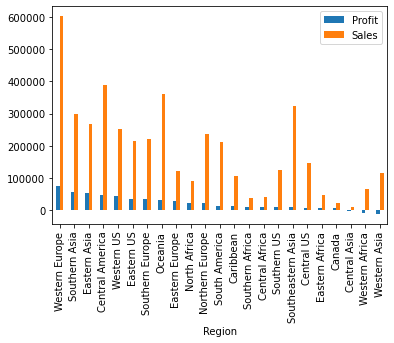

In [35]:
#lets look at performance of each region by sales and profit
pysales.groupby('Region')[['Profit', 'Sales']].sum().sort_values('Profit', ascending = False).plot(kind='bar')

#we can immediately see that the profit margin of each region is very poor, there also seems to be a trend where profits
#increase with sales. The strongest regions are Western Europe, Southern Asia and the weakest appear to be Western Asia
#and Western Africa, that have negative profits. Overall, the company is producing positive profits.

<AxesSubplot:xlabel='Category'>

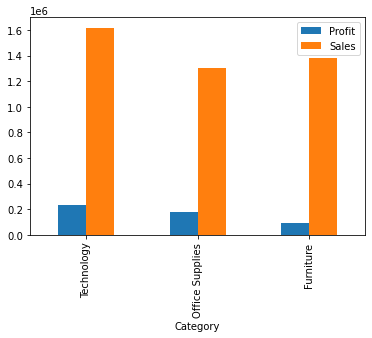

In [36]:
#lets look at performance of each Category of products by sales and profit
pysales.groupby('Category')[['Profit', 'Sales']].sum().sort_values('Profit', ascending = False).plot(kind='bar')

#from this plot we can see that Technology is the most profitable category, however, Office Supplies has the better
#profit-to-sales ratio

<AxesSubplot:xlabel='Category', ylabel='Profit'>

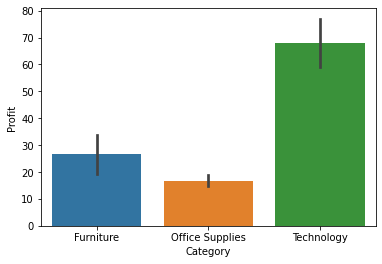

In [37]:
#lets look at a barplot of the above categories
sns.barplot(x="Category", y="Profit", data=pysales)

#the barplot agrees that Technology brings in the most profit, however, Office Supplies brings in the least Profit per item

<AxesSubplot:xlabel='Segment'>

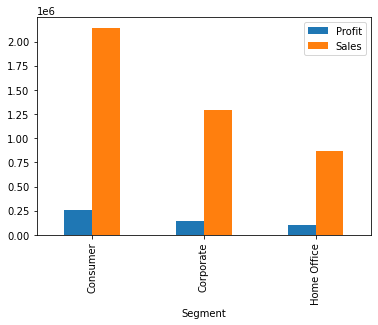

In [38]:
#lets look at performance of each Segment of products by sales and profit
pysales.groupby('Segment')[['Profit', 'Sales']].sum().sort_values('Profit', ascending = False).plot(kind='bar')

# Impact of Discount on Profit

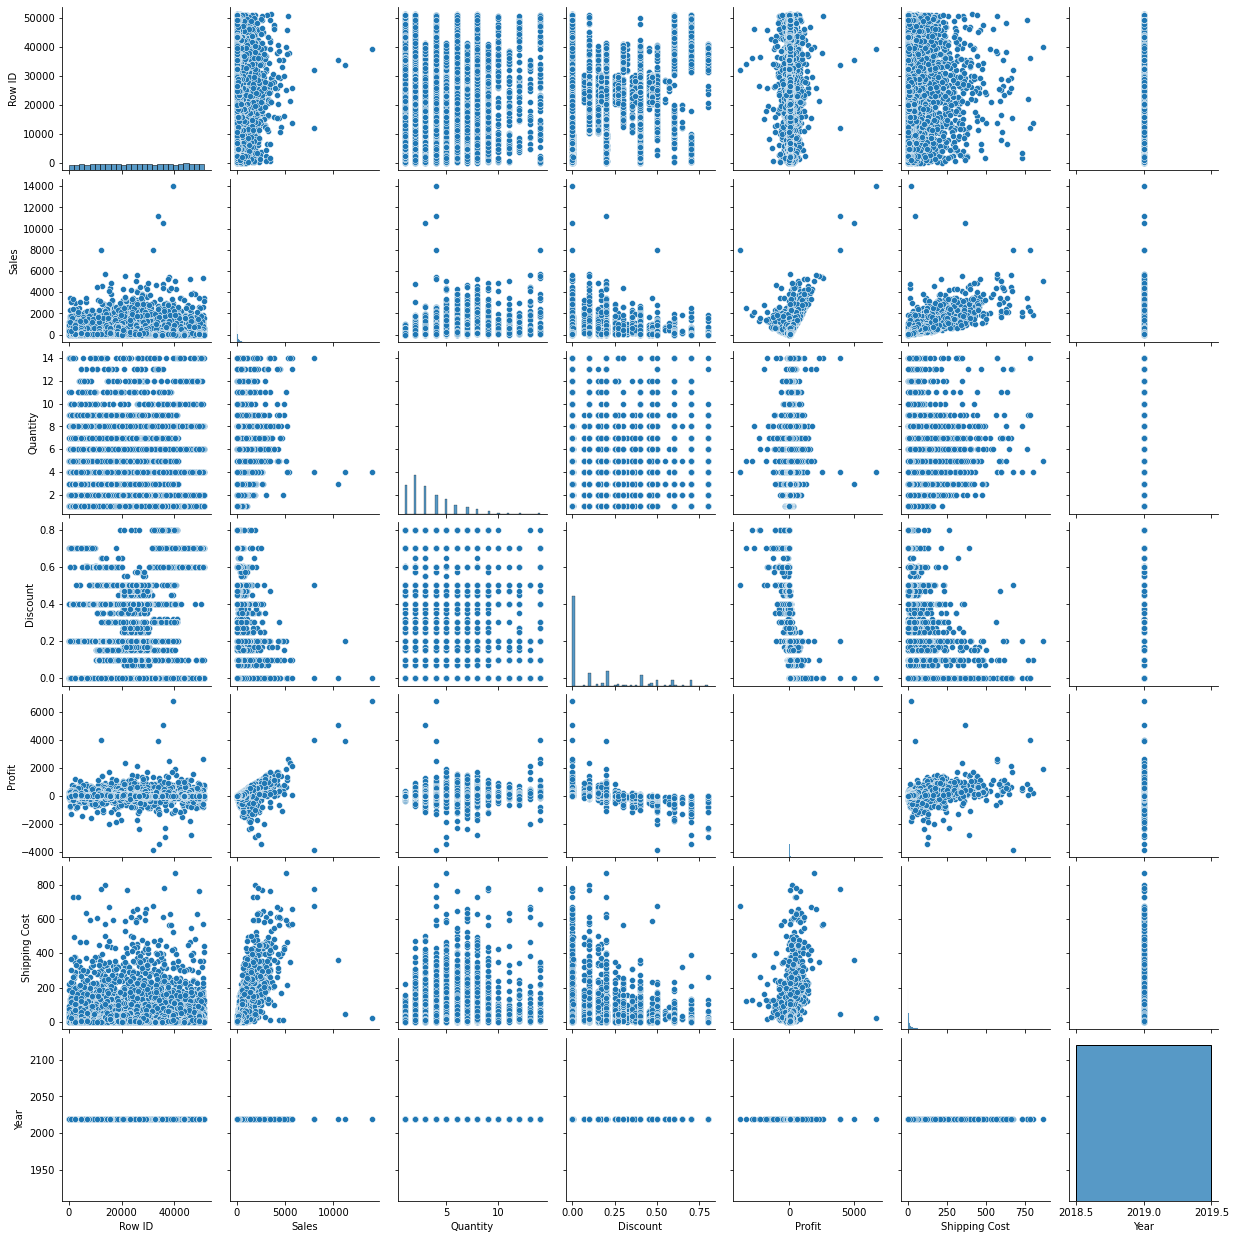

In [39]:
#lets first look at a scatter plot of all numerical variables against each other
sns.pairplot(pysales)

#from the profit row, we can see that increasing sales mostly increases profits, increasing quantity has no clear trend
#while increasing discounts, decreases profits

In [41]:
#lets look at the summary statistics of discount and profit
pysales.describe()

#discount appears to be skewed, however, maximum discounts appear to go upto 0.8. Minimum profit also goes upto -3840

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,Year
count,17531.00,17531.00,17531.00,17531.00,17531.00,17531.00,17531.00
mean,25933.97,245.27,3.46,0.14,28.76,26.37,2019.00
std,14733.58,477.63,2.29,0.21,174.28,56.50,0.00
min,1.00,0.44,1.00,0.00,-3839.99,1.01,2019.00
25%,13169.50,30.35,2.00,0.00,0.00,2.57,2019.00
50%,25826.00,84.48,3.00,0.00,9.20,7.72,2019.00
75%,38803.50,251.13,5.00,0.20,36.81,24.45,2019.00
max,51284.00,13999.96,14.00,0.80,6719.98,867.69,2019.00


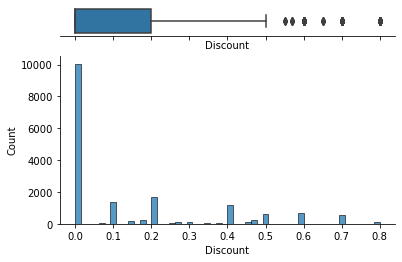

In [47]:
#lets look at the boxplot and distplot of discount
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,  

                                    gridspec_kw={"height_ratios": (.15, .85)}) 

  

sns.boxplot(x=pysales['Discount'], ax=ax_box) 

sns.histplot(x=pysales['Discount'], ax=ax_hist) 

  

ax_box.set(yticks=[]) 

sns.despine(ax=ax_hist) 

sns.despine(ax=ax_box, left=True) 

#discounts of upto 0.5 could be acceptable, anything beyond this would introduce negative profits

In [58]:
#lets now look at the average discount applied across all the regions

pysales.groupby('Region')['Discount'].mean().sort_values(ascending = False)
#we can see that the worst three regions in terms of profit are the ones where mean discounts are the highest, thus
#an analysis of products and discounts applied should be further investigated to turn these regions into profitable businesses.

Region
Western Africa      0.38
Central Asia        0.36
Western Asia        0.35
Southeastern Asia   0.27
Central US          0.24
South America       0.17
Oceania             0.17
Southern US         0.16
Northern Europe     0.15
Eastern US          0.15
Eastern Africa      0.14
Caribbean           0.13
Central America     0.12
Western US          0.11
Western Europe      0.09
Southern Europe     0.09
Southern Asia       0.05
Eastern Asia        0.05
North Africa        0.00
Southern Africa     0.00
Eastern Europe      0.00
Central Africa      0.00
Canada              0.00
Name: Discount, dtype: float64

# End

In the next notebook, we will look at forecasting sales using ARIMA models.